In [6]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [7]:
df = pd.read_csv("MISSING_merged_data.csv")

In [8]:
df.Revenue_x

0          {'Domestic': 187222, 'International': 187222}
1      {'Domestic': 19060660, 'International': 482347...
2                                                     {}
3                                                     {}
4            {'Domestic': 56928, 'International': 56928}
                             ...                        
160                                                   {}
161                {'Domestic': 64, 'International': 64}
162                                                   {}
163                                                   {}
164          {'Domestic': 30556, 'International': 30556}
Name: Revenue_x, Length: 165, dtype: object

In [9]:
def extract_domestic_revenue(string):
    try:
        revenue_dict = ast.literal_eval(string)
        return revenue_dict.get('Domestic', None)
    except (ValueError, SyntaxError):
        return None
def extract_international_revenue(string):
    try:
        revenue_dict = ast.literal_eval(string)
        return revenue_dict.get('International', None)
    except (ValueError, SyntaxError):
        return None
def extract_worldwide_revenue(string):
    try:
        revenue_dict = ast.literal_eval(string)
        return revenue_dict.get('Worldwide', None)
    except (ValueError, SyntaxError):
        return None

# Create a new column for domestic revenue
df['domestic_revenue'] = df['Revenue_x'].apply(extract_domestic_revenue)
df["international_revenue"] =  df['Revenue_x'].apply(extract_international_revenue)
df["worldwide_revenue"] =  df['Revenue_x'].apply(extract_worldwide_revenue)

df = df.drop('Revenue_x', axis=1)
df.to_csv("MISSING_merged_data_with_revenue.csv")

In [49]:
df["domestic_revenue"].dropna()

6            2241.0
7              37.0
8        19701164.0
29         134049.0
51        1561962.0
            ...    
35060      268136.0
35066      864271.0
35068    50452282.0
35069        5206.0
35072      248343.0
Name: domestic_revenue, Length: 6309, dtype: float64

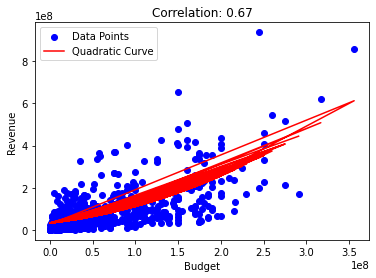

Correlation between Budget and Revenue: 0.6665081370760513


In [67]:
df_cleaned = df.dropna(subset=['Budget_x', 'domestic_revenue'])

log_budget = np.log(df_cleaned['Budget'])
# Calculate the correlation between 'Budget' and 'Revenue'
correlation = df_cleaned['Budget_x'].corr(df_cleaned['domestic_revenue'])

plt.scatter(df_cleaned['Budget_x'], df_cleaned['domestic_revenue'], color='blue', label='Data Points')

# Add a trendline
#plt.plot(df_cleaned['Budget_x'].values, df_cleaned['Budget_x'].values * correlation, color='red', label='Trendline')

# Fit a quadratic curve
fit = np.polyfit(df_cleaned['Budget_x'].values, df_cleaned['domestic_revenue'].values, 2)
quad_line = np.polyval(fit, df_cleaned['Budget_x'].values)

# Plot the quadratic curve
plt.plot(df_cleaned['Budget_x'].values, quad_line, color='red', label='Quadratic Curve')

# Set labels and title
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title(f'Correlation: {correlation:.2f}')

# Display legend
plt.legend()

# Show the plot
plt.show()
# Display the correlation
print(f"Correlation between Budget and Revenue: {correlation}")

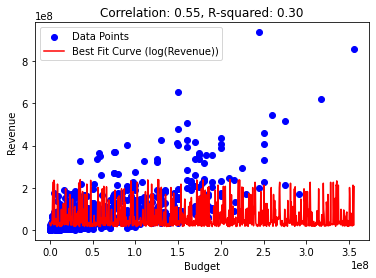

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Drop rows with missing values in 'Budget' and 'Revenue'
df_cleaned = df.dropna(subset=['Budget_x', 'domestic_revenue'])

# Take the logarithm of 'Budget' and 'Revenue'
log_revenue = np.log(df_cleaned['domestic_revenue'])

# Fit a quadratic curve to the log of budget
fit = np.polyfit(df_cleaned["Budget_x"], log_revenue, 2)
quadratic_line = np.polyval(fit, df_cleaned["Budget_x"])

# Calculate the correlation between the log of 'Budget' and log of 'Revenue'
correlation = np.corrcoef(df_cleaned["Budget_x"], log_revenue)[0, 1]

# Calculate R-squared
slope, intercept, r_value, p_value, std_err = linregress(df_cleaned["Budget_x"], log_revenue)
r_squared = r_value**2

# Plot the data points
plt.scatter(df_cleaned['Budget_x'], df_cleaned['domestic_revenue'], color='blue', label='Data Points')

# Plot the quadratic curve
budget_range = np.linspace(df_cleaned["Budget_x"].min(), df_cleaned["Budget_x"].max(), 790)
plt.plot(budget_range, np.exp(quadratic_line), color='red', label='Best Fit Curve (log(Revenue))')

# Set labels and title
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title(f'Correlation: {correlation:.2f}, R-squared: {r_squared:.2f}')

# Display legend
plt.legend()

# Show the plot
plt.show()


<AxesSubplot:xlabel='Budget_x', ylabel='domestic_revenue'>

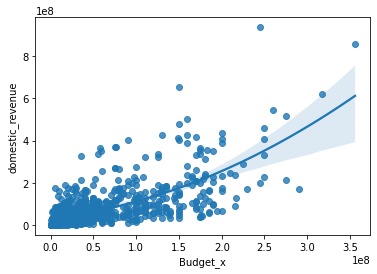

In [77]:
# Drop rows with missing values in 'Budget' and 'Revenue'
df_cleaned = df.dropna(subset=['Budget_x', 'domestic_revenue'])
sns.regplot(x=df_cleaned["Budget_x"], y=df_cleaned["domestic_revenue"],order=2)

In [80]:
tmdb_revs = df[df["Revenue_y"]!=0]

In [94]:
tmdb_revs

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Running Time,Genres,Title_x,MPAA,Domestic Distributor,Domestic Opening,Earliest Release Date,...,Revenue_y,Runtime,Title_y,movie_id,cast_ids,order,director_ids,domestic_revenue,international_revenue,worldwide_revenue
8,8,41420,41420,1 hr 49 min,Action Crime Drama Mystery Thriller,Broken City (2013),R,Twentieth Century Fox,8268908.0,"January 18, 2013 (Domestic, EMEA)",...,34737199.0,109.0,Broken City,98357,"[13240, 934, 1922, 2954, 12834, 203096, 76511,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[11448],19701164.0,15036035.0,34737199.0
51,51,41463,41463,1 hr 46 min,Biography Drama History War,"Bless Me, Ultima (2012)",PG-13,Arenas Entertainment,470109.0,"February 22, 2013 (Domestic)",...,1553826.0,106.0,"Bless Me, Ultima",164184,"[1116235, 1163, 2137, 224507, 3979, 76857, 116...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",[21712],1561962.0,1561962.0,NaN
82,82,41494,41494,1 hr 29 min,Action Adventure Comedy Horror Sci-Fi Thriller,Spiders (2013),PG-13,Millennium Entertainment,NaN,"February 8, 2013 (Domestic)",...,257019.0,89.0,Spiders,164331,"[115440, 85178, 24605, 41687, 85516, 10207, 13...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[42309],257019.0,257019.0,NaN
100,100,41512,41512,1 hr 56 min,Action Crime Drama Thriller,Out of the Furnace (2013),R,Relativity Media,5220288.0,"December 4, 2013 (Domestic)",...,15400000.0,116.0,Out of the Furnace,164457,"[3894, 8691, 57755, 9880, 5293, 2178, 1893, 46...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[65167],11330849.0,4330705.0,15661554.0
119,119,41531,41531,1 hr 32 min,Documentary Music,One Direction: This Is Us (2013),PG,TriStar Pictures,15815497.0,"August 28, 2013 (EMEA)",...,68500000.0,92.0,One Direction: This Is Us,164558,"[1052109, 1146050, 1052108, 1052107, 1052106, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[57492],28873374.0,39694467.0,68567841.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35036,35036,76809,76809,1 hr 41 min,Adventure Animation Comedy Drama Family Fantas...,Elemental (2023),PG,Walt Disney Studios Motion Pictures,29602429.0,"June 14, 2023 (APAC)",...,486797988.0,102.0,Elemental,976573,"[1087262, 1639848, 1236458, 2073564, 63234, 11...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[21198],154426697.0,336508404.0,490935101.0
35057,35057,76830,76830,1 hr 38 min,Horror,Two Witches (2021),NaN,NaN,NaN,"February 23, 2023 (Colombia)",...,537974.0,95.0,Two Witches,785759,"[2283865, 1681685, 2934926, 1070188, 1492017, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",[2642445],537974.0,537974.0,NaN
35058,35058,76831,76831,1 hr 31 min,Horror Thriller,Consecration (2023),R,IFC Films,329951.0,"February 9, 2023 (Slovenia)",...,1504289.0,90.0,Consecration,884184,"[20089, 6413, 2170974, 67026, 95716, 2108331, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[41041],538551.0,1733518.0,2272069.0
35068,35068,76841,76841,1 hr 43 min,Comedy Romance,No Hard Feelings (2023),R,Sony Pictures Entertainment (SPE),15002770.0,"June 21, 2023 (EMEA)",...,82995526.0,104.0,No Hard Feelings,884605,"[72129, 2914688, 60034, 4756, 118752, 209087, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[84416],50452282.0,36634541.0,87086823.0


In [89]:
imdb_revs = df.dropna(subset=["domestic_revenue"])

In [90]:
imdb_revs

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Running Time,Genres,Title_x,MPAA,Domestic Distributor,Domestic Opening,Earliest Release Date,...,Revenue_y,Runtime,Title_y,movie_id,cast_ids,order,director_ids,domestic_revenue,international_revenue,worldwide_revenue
6,6,41418,41418,1 hr 22 min,Documentary Sport,Into the Mind (2013),NaN,NaN,NaN,"January 31, 2014 (Spain)",...,0.0,83.0,Into the Mind,163875,"[124065, 587712, 587879, 582159, 90226, 582154...","[0, 1, 2, 3, 4, 5, 6, 7, 8]","[112813, 590724]",2241.0,2241.0,NaN
7,7,41419,41419,8 min,History Short,In Search of Lost Time (2013),NaN,NaN,NaN,"September 30, 2007 (South Korea)",...,0.0,8.0,In Search of Lost Time,983081,[],[],[3384263],37.0,37.0,NaN
8,8,41420,41420,1 hr 49 min,Action Crime Drama Mystery Thriller,Broken City (2013),R,Twentieth Century Fox,8268908.0,"January 18, 2013 (Domestic, EMEA)",...,34737199.0,109.0,Broken City,98357,"[13240, 934, 1922, 2954, 12834, 203096, 76511,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[11448],19701164.0,15036035.0,34737199.0
29,29,41441,41441,1 hr 30 min,Drama,Redwood Highway (2013),PG-13,Monterey Media,30.0,"April 11, 2014 (Domestic)",...,0.0,90.0,Redwood Highway,262357,"[28778, 4139, 123516, 1169115, 62760, 7134, 11...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",[133426],134049.0,134049.0,NaN
51,51,41463,41463,1 hr 46 min,Biography Drama History War,"Bless Me, Ultima (2012)",PG-13,Arenas Entertainment,470109.0,"February 22, 2013 (Domestic)",...,1553826.0,106.0,"Bless Me, Ultima",164184,"[1116235, 1163, 2137, 224507, 3979, 76857, 116...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",[21712],1561962.0,1561962.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35060,35060,76833,76833,1 hr 34 min,Horror,Elevator Game (2023),NaN,NaN,NaN,"August 24, 2023 (Russia/CIS)",...,0.0,94.0,Elevator Game,1015303,"[1780952, 2511594, 2537199, 1742672, 4282938, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]",[1521437],268136.0,268136.0,NaN
35066,35066,76839,76839,1 hr 25 min,Family,"Red, White & Brass (2023)",NaN,NaN,NaN,"March 23, 2023 (New Zealand)",...,0.0,85.0,"Red, White & Brass",1081156,"[3900667, 3223391, 3999400, 3999401, 3999402, ...","[0, 1, 2, 3, 4, 5]",[2430028],864271.0,864271.0,NaN
35068,35068,76841,76841,1 hr 43 min,Comedy Romance,No Hard Feelings (2023),R,Sony Pictures Entertainment (SPE),15002770.0,"June 21, 2023 (EMEA)",...,82995526.0,104.0,No Hard Feelings,884605,"[72129, 2914688, 60034, 4756, 118752, 209087, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[84416],50452282.0,36634541.0,87086823.0
35069,35069,76842,76842,1 hr 36 min,Drama,The Integrity of Joseph Chambers (2022),NaN,NaN,NaN,"July 6, 2023 (Netherlands)",...,0.0,96.0,The Integrity of Joseph Chambers,950161,"[59671, 22123, 53259, 47296, 2176925, 1922620,...","[0, 1, 2, 3, 4, 5, 6, 7]",[1141753],5206.0,5206.0,NaN


In [92]:
len(set(tmdb_revs["IMDB ID"]).difference(set(imdb_revs["IMDB ID"])))

118

In [93]:
len(set(imdb_revs["IMDB ID"]).difference(set(tmdb_revs["IMDB ID"])))

3797

In [95]:
len(set(imdb_revs["IMDB ID"]).intersection(set(tmdb_revs["IMDB ID"])))

2512